In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Bernoulli naive Bayes

Run the below cell to get the following variables:

`X` = Data matrix of shape $(n, d)$. All the features are binary taking values $0$ or $1$.

`y` = label vector. Labels are $0$ and $1$.

In [2]:
rng = np.random.default_rng(seed=1)
X1 = np.concatenate((rng.binomial(size = 50,n = 1, p =0.7), rng.binomial(size = 50,n = 1, p =0.2))).reshape(-1, 1)
X2 = np.concatenate((rng.binomial(size = 50,n = 1, p =0.6), rng.binomial(size = 50,n = 1, p =0.1))).reshape(-1, 1)
X3 = np.concatenate((rng.binomial(size = 50,n = 1, p =0.6), rng.binomial(size = 50,n = 1, p =0.2))).reshape(-1, 1)
X4 = np.concatenate((rng.binomial(size = 50,n = 1, p =0.8), rng.binomial(size = 50,n = 1, p =0.1))).reshape(-1, 1)


X = np.column_stack((X1,X2,X3,X4))

y = np.concatenate((np.zeros(50, dtype= int), np.ones(50, dtype = int))).reshape(-1, 1)
permute = rng.permuted(range(100)) 

X = X[permute]
y = y[permute]


## Question 1
If we train the naive Bayes model on the dataset, What will be the value of $\hat{p}$, the estimate for $P(Y=1)$? 

In [3]:
np.sum(y)/len(y)

0.5

## Question 4
What will be the value of $\hat{p}$, the estimate of $P(f_3=z|y=x)$ over all z and x?

In [4]:
labels = np.unique(y)
for i in labels:
  X_c = X[y.flatten()==i]
  for j in range(X.shape[1]):
    print(f'P(f_{j}=1|y={i})=' , np.sum(X_c[:, j])/X_c.shape[0]) 

P(f_0=1|y=0)= 0.68
P(f_1=1|y=0)= 0.64
P(f_2=1|y=0)= 0.6
P(f_3=1|y=0)= 0.84
P(f_0=1|y=1)= 0.26
P(f_1=1|y=1)= 0.14
P(f_2=1|y=1)= 0.18
P(f_3=1|y=1)= 0.12


In [5]:
def estimates(X, y):
  p_hat = np.sum(y)/len(y)
  #X_c = X[y.flatten()==1]
  #labels = np.unique(y)
  #p_hat = len(X_c)/X.shape[0]
  est = np.zeros((len(labels), X.shape[1]))
  for i in labels:
    X_c = X[y.flatten()==i]
    for j in range(X.shape[1]):
      est[i][j] =np.sum(X_c[:, j])/X_c.shape[0]

  return p_hat, est


In [6]:
p, est = estimates(X, y)

In [7]:
est

array([[0.68, 0.64, 0.6 , 0.84],
       [0.26, 0.14, 0.18, 0.12]])

## Question 5

What will be the predicted label for the point $[1, 0, 1, 0]$? 

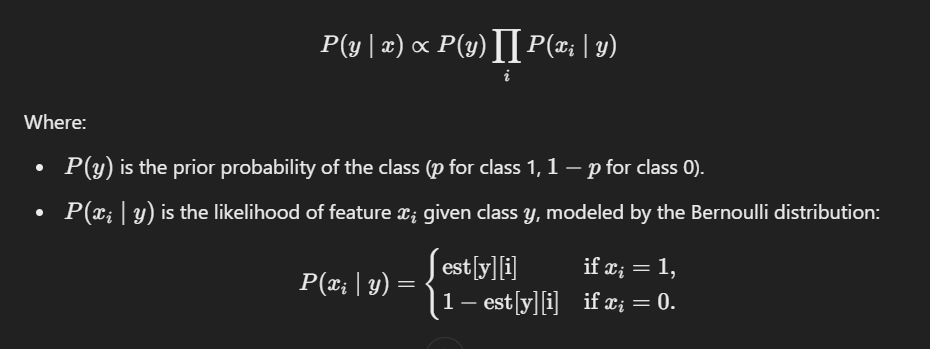

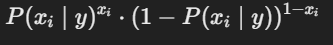 This is the formula for likelihood

In [8]:
def predict(x, est, p):
  p0 = 1-p
  for idx, k in enumerate(x.flatten()):
    p0=p0*((est[0][idx])**k)*((1-est[0][idx])**(1-k))
  p1 = p
  for idx, l in enumerate(x.flatten()):
    p1=p1*((est[1][idx])**l)*((1-est[1][idx])**(1-l))
  if p0>p1:
    return 0
  return 1


In [9]:
x1 = np.array([[1], [0], [1], [0]])

predict(x1, est, p)

1

## Question 6

What will be the predicted label for the point $[1, 0, 1, 1]$? 

In [10]:
new_x = np.array([[1], [0], [1], [1]])

predict(new_x, est, p)

0

In [11]:
p1 = p
for idx, x in enumerate(new_x.flatten()):
  p1=p1*((est[1][idx])**x)*((1-est[1][idx])**(1-x))
p1

0.00241488

# Gaussian naive Bayes

Run the below cell to get the following variables:

`X_train` = Training dataset of the shape $(n, d)$. All the examples are coming from multivariate gaussian distribution.

`y_train` = label vector for corresponding training examples. labels are $0$ and $1$.

`X_test` = Test dataset of the shape $(m, d)$, where $m$ is the number of examples in the test dataset. All the examples are coming from multivariate gaussian distribution.

`y_test` = label vector for corresponding test examples. labels are $0$ and $1$.



In [12]:
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split

# generate artificial data points
X, y = make_blobs(n_samples = 100,n_features=2,centers=[[5,5],[10,10]],cluster_std=1.5,random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=123)

## Question 7

How many examples are there in the trianing dataset?

In [13]:
X_train.shape[0]

80

## Question 8
How many features are there in the dataset?

In [14]:
X_train.shape[1]

2

## Question 9

If we train the Gaussian naive Bayes model on the trianing dataset, What will be the value of $\hat{p}$, the estimate for $P(Y=1)$? Write your answer correct to two decimal places.



In [15]:
def priors(y):
  return np.mean(y)

In [16]:
p = priors(y_train)
p

0.4875

## Question 10

Calculate $\hat{\mu}_0 = [\mu_1, \mu_2, ..., \mu_d]$ be the estimate for $\mu_0$.

In [17]:
labels = np.unique(y)

In [18]:
def Gestimates(X, y):
  labels = np.unique(y)
  mean = np.zeros((len(labels), X.shape[1]))
  var = np.zeros((len(labels), X.shape[1]))
  for idx, c in enumerate(labels):
    X_c = X[y.flatten()==c]
    mean[idx, :] = np.mean(X_c, axis = 0)
    var[idx, :]=np.var(X_c, axis = 0)
  return mean, var

In [19]:
mu, sigma = Gestimates(X_train, y_train)

We will be using the different covariances for different labeled examples. The estimate for $\Sigma_k$ will be 

$\hat{\Sigma}_k = \sigma_iI$ where $\sigma_i$ is the variance of $i^{th}$ feature values of examples labeled $k$.



## Question 11
What will be value of $\text{trace}({\hat{\Sigma}}_0)$?

In [ ]:
np.sum(sigma[0])

4.435204194501573

## Question 12

Once we have estimated all the parameters for Gaussian naive Bayes assuming the different covariance matrices, we predict the labels for the training examples. What will be the training accuracy?


In [20]:
def G_pdf(X, p, mean, var, label):
  covar = np.diag(var[label]) 
  z = np.power(2 * np.pi, X.shape[0]/2) * np.power(np.linalg.det(covar), 1/2)
  return (1/z) * np.exp(-(1/2)*(X - mean[label]).T@(np.linalg.inv(covar))@(X - mean[label]))

In [21]:
def predict(X, p, mean, var, label):
  Likelihood_prior = np.zeros((X.shape[0], len(label)))
  for x_idx, x in enumerate(X):
    for idx, c in enumerate(label):
      Likelihood_prior[x_idx, c] = np.log(G_pdf(x, p, mean, var, c)) + (np.log((p**(c))*((1-p)**(1-c))))
  return np.argmax(Likelihood_prior, axis=1)
  #return Likelihood_prior

In [22]:
np.mean(predict(X_train, p, mu, sigma, labels)==y_train)

0.9875

## Question 13

What will be the test accuracy?

In [23]:
np.mean(predict(X_test, p, mu, sigma, labels)==y_test)

1.0